In [ ]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

In [ ]:
from pathlib import Path
base_path = Path() # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

## Wstęp
Ten notebook wprowadzi cię w świat analizy i przetwarzania danych — to pierwszy i niezbędny krok przed zastosowaniem jakiegokolwiek algorytmu uczenia maszynowego.

Można to porównać do gotowania: nawet najlepszy kucharz (czyli ty — przyszły programista AI) ugotuje niesmaczną potrawę (czyli niedziałający algorytm), jeśli wcześniej nie umyje, nie obierze i nie odważy składników (czyli danych).

Krok po kroku przeprowadzimy cię przez najważniejsze czynności, które warto zapamiętać jako punkty kontrolne przy każdej analizie danych. Zapoznasz się z tym, jak sprawnie wyciągać z danych interesujące cię informacje poprzez **filtrowanie**, **grupowanie** i **łączenie danych**. Dowiesz się, jakie transformacje możesz wykonywać na danych aby je **oczyścić** i **zakodować** numerycznie. Nie ominie cię też cała gama możliwych **wizualizacji** danych, w tym ich rozkładów oraz zależności między dwoma zmiennymi.


Do ćwiczeń wykorzystamy następujące zbiory danych:


*   [Social Media Sentiment Analysis](https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset): zbiór zawierający informacje o wpisach w różnych mediach społecznościowych wraz z ich sentymentem,
*   [Medical Insurance Price Prediction](https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction): zbiór opisujący czynniki wpływające na wysokość ubezpieczenia.

Notebook jest podzielony na następujące sekcje:

- Wprowadzenie do biblioteki **numpy**
- Wprowadzenie do biblioteki **pandas**
- Przetwarzanie danych przy pomocy **pandas**  
- Wprowadzenie do bibliotek **matplotlib** i **seaborn**
- Wizualizacja danych przy pomocy **matplotlib** i **seaborn**


W trakcie przechodzenia przez sekcje możesz napotkać zdania zaczynające się od symbolów, które wyjaśniamy poniżej:
- ❓ dodatkowe zagadnienie do samodzielnej realizacji które pozwoli ci jeszcze bardziej poszerzyć wiedzę,
- 💡 wprowadza ważne, prawdopodobnie nieznane ci narzędzie w pythonie lub pojęcie, które warto zapamiętać,
- ☝ wskazuje na miejsca potencjalnych błędów czy pomyłek.


#### Nie bój się dodawać swoich komórek i zmieniać istniejących - to może być tylko szansa dla ciebie na poćwiczenie mięśnia mózgowego :).

## 0. Wprowadzenie do biblioteki **numpy**

Zanim wprowadzimy cię do biblioteki **pandas** istotne jest, żebyś zapoznał(a) się z biblioteką **numpy**. Jest ona głównie wykorzystywana do operacji na macierzach, które będą też przydatne na kolejnych lekcjach.

In [ ]:
import numpy as np # import

Macierz (ang. array) to w najprostszych słowach tabela składająca się z wierszy i kolumn. Umożliwia wykonywanie operacji znanych z algebry liniowej, takich jak dodawanie, mnożenie czy transpozycja.

In [ ]:
arr = np.array([[1, 2], [3, 4]])
arr

💡 Atrybut `shape` zwraca krotkę postaci (liczba wierszy, liczba kolumn).

In [ ]:
arr.shape

Atrybut **T** zwraca widok transponowanej macierzy.

In [ ]:
arr.T

💡 Większość działań na macierzach w numpy można zapisać w przyjazny sposób dzięki wewnętrznym mechanizmom (typu [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) który dostosowuje rozmiary macierzy)  usuwając zbędne operacje na zagnieżdżonych pętlach.

❓ Przeanalizuj wyniki poniżej i pomyśl, jak byś zapisał(a) te operacje działając na listach pythonowych.

In [ ]:
arr2 = np.array([[1.5, 3]])
print(f"arr=\n{arr}")
print(f"arr2=\n{arr2}")
print(f"example of broadcasting (implicit): \narr + 2=\n{arr + 2}\narr * 2=\n{arr * 2}")
print(f"multiplication 'element-wise': arr * arr2=\n{arr * arr2}")
print(f"addition 'element-wise': arr + arr2=\n{arr + arr2}")
print(f"dot-product: arr2 @ arr=\n{arr2 @ arr}")

Numpy umożliwia tworzenie wielowymiarowych struktur, znanych ogólnie pod pojęciem **tensorów**.

In [ ]:
np.random.rand(2, 3, 4)

## 1. Wprowadzenie do biblioteki **pandas**

In [ ]:
import pandas as pd # import

### 1.1 Wczytywanie danych
Dane z którymi spotkasz się mogą być w różnym formacie - np. jako baza danych, JSON lub pilk CSV. Skupimy się na tym ostatnim, ponieważ tak najczęściej występują *dane tabelaryczne*, które zawierają strukturę wierszy i kolumn.

Do wczytania zbiorów użyjemy funkcji [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), która domyślnie zakłada, że kolejne kolumny w wierszu są rozdzielone przecinkiem.



In [ ]:
medical_insurance_data = pd.read_csv(base_path / 'Medical_insurance_corrputed.csv')
social_media_data = pd.read_csv(base_path / 'sentimentdataset_corrputed_2.csv', index_col=0)

💡 `DataFrame` (będziemy się posługiwać tłumaczeniem *ramka danych*) nie tylko przechowuje dane, ale udostępnia funkcje i atrybuty z którymi zapoznasz się w dalszych sekcjach.

In [ ]:
type(social_media_data)

💡 Funkcja `head` służy do wyświetlania pierwszych wierszy, jest wygodna jeśli chcesz "rzucić okiem" na ramkę tuż po jej wczytaniu.

In [ ]:
social_media_data.head()

In [ ]:
medical_insurance_data.head()

❓ jak byś wyświetlił(a) ostatnie rzędy? (Podpowiedź: zerknij do [dokumentacji DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#indexing-iteration))



Podobnie jak dla `np.array` dostępny jest też atrybut `shape`.

In [ ]:
medical_insurance_data.shape

In [ ]:
social_media_data.shape

Szkieletem ramki danych jest macierz (`np.array`), którą można wybrać atrybutem `values`.

In [ ]:
medical_insurance_data.values

### 1.2 Indeksowanie

Jedną z podstawowych czynności związanych z ramką danych jest poruszanie się po niej. Co to dokładnie oznacza? Patrząc na wyświetlone tabelki powyżej pewnie wyobrażasz sobie, jak może być trudne przeanalizowanie tylko wybranej kolumny. Podobnie możemy chcieć skupić się na paru rzędach. Aby dać ci pełniejszy obraz struktury ramki, posłużymy się wizualizacją poniżej.

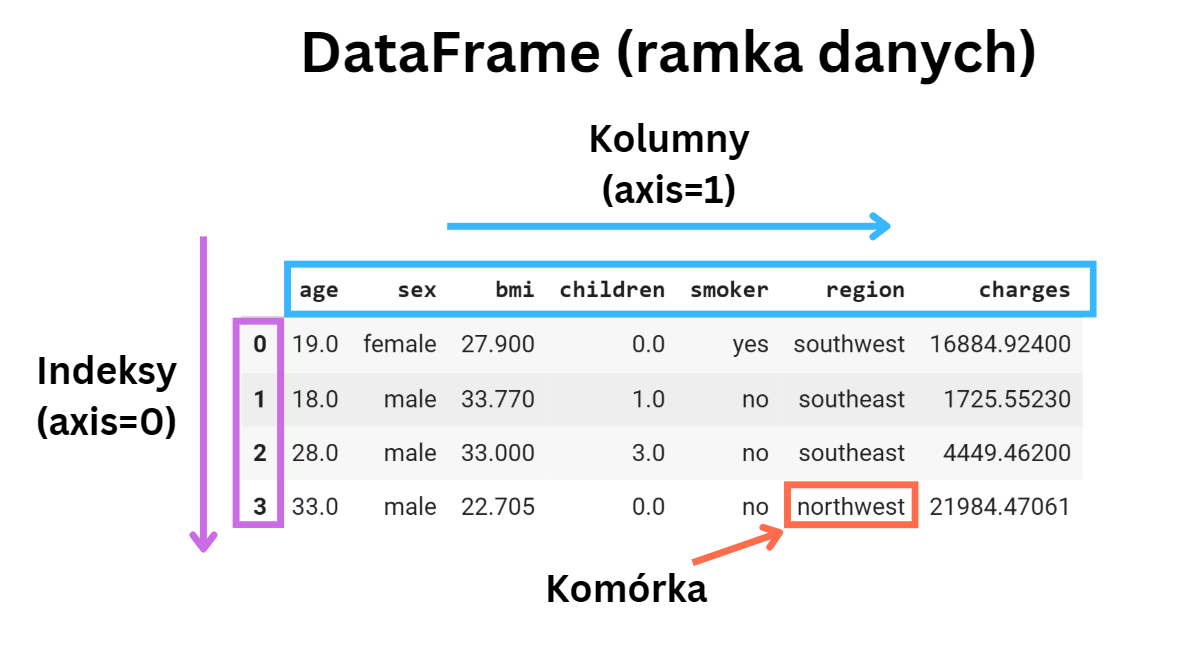

Jak widzisz, wyróżniamy dwie osie (axis), wzdłuż których możemy dokonywać operacji. Indeks unikalnie identyfikuje wiersz, tak samo jak nazwa kolumny identyfikuje konkretny atrybut. Przecięcie wybranej kolumny i rzędu daje nam konkretną wartość. Przejdźmy do przykładów.

#### Wybór kolumn

💡 Kolumny w uczeniu maszynowym utożsamiamy z cechami (ang. [**features**](https://en.wikipedia.org/wiki/Feature_(machine_learning))), takimi jak np. wiek, kraj, data. Nazywamy je też ogólnie *zmiennymi* (pojęcie ze statystyki).

In [ ]:
social_media_data['User'] # single column

In [ ]:
social_media_data[['Platform', 'Hashtags']] # multiple columns (pass a list of names)

❓ Czy zgadniesz jak nazywa się atrybut ramki który zawiera listę z nazwami kolumn?

#### Wybór wierszy
Służy do tego operator `loc[]`, który przyjmuje wartości indeksów. Używa kwadratowych nawiasów, a nie okrągłych tak jak typowo w wywołaniach funkcji.

In [ ]:
social_media_data.loc[600]

💡 Bratnim typem `pd.DataFrame` jest `pd.Series` (*szereg*), które można rozumieć jako ramkę z tylko jedną kolumną.

In [ ]:
type(social_media_data.loc[600])

❓ Jaki typ będzie mieć selekcja

```
social_media_data['User']
```
a jaki


```
social_media_data[['User']]
```

💡Operator "**:**" służy do określania przedziału od - do. Na początku możesz to skojarzyć z przedziałami otwartymi, otwartymi jednostronnie lub domkniętymi z lekcji/zajęć z matematyki.

In [ ]:
social_media_data.loc[1:4]

Możemy też wybrać konkretne wartości indeksów i przekazać jako listę.

In [ ]:
social_media_data.loc[[600, 704]]

#### Wybór przecięcia
Jeszcze przydatniejszą możliwością jest wybranie konkretnej kolumny i konkretnych wierszy jednocześnie. Do tego też można zastosować `loc[]`, tym razem z dwoma argumentami - pierwszy na selekcję wierszy, drugi na selekcję kolumn.

In [ ]:
social_media_data.loc[8, 'User']

❓Czy widzisz jakiś problem z wynikową wartością powyżej?

In [ ]:
social_media_data.loc[8, ['Platform', 'Hashtags']]

☝ Selekcja postaci *index_dolny:index_górny* uwzględnia obydwa indeksy w wyniku, co może nie być oczywiste, jeśli kojarzysz funkcję pythonową `range` uwzględniającą zakres *index_dolny:index_górny - 1*.

In [ ]:
social_media_data.loc[700:710, ['Hashtags', 'Platform', 'Text']]

Użycie zakresu **:** działa również na kolumnach, jednak zależy od ich kolejności występowania.

In [ ]:
social_media_data.loc[[600, 700], 'Timestamp':'Hashtags']

Możemy też najpierw wybrać wiersze, a potem na uzyskanej mniejszej ramce wybrać kolumny.

In [ ]:
social_media_data.loc[:3][['Retweets', 'Likes']]

❓Jak inaczej byś zapisał(a) powyższą selekcję wykorzystując tylko jeden operator?

💡 Istnieje również bliźniaczy selektor `iloc[]`, który nie opiera się na nazwach indeksów czy kolumn, a jedynie wspiera selekcję liczbową - tak jak na macierzach dwuwymiarowych.

In [ ]:
social_media_data.iloc[-1:, [0, 3]]

❓ Czy wg ciebie w ten sposób wygodnie jest wybierać kolumny?

### 1.3 Typy danych

Zanim skoczysz prosto do tworzenia wyrafinowanych wizualizacji oraz obliczania statystyk dla danych, przyjrzyj się, czy ich typy są odpowiednie. Nie zawsze możemy zakładać, że funkcja wczytująca dane poprawnie je przypisała. Dlaczego jest to ważne? Pomyśl o sytuacji, w której wiesz, że dana kolumna oznacza np. liczbę zebranych pokemonów. Czy można zebrać 2.33 pokemony? Jaki typ danych jest tutaj odpowiedni?

In [ ]:
medical_insurance_data.info()

❓ Czy widzisz jakiś nieodpowiedni typ danych dobrany do kolumny?

In [ ]:
medical_insurance_data.dtypes

Powyższy wynik może posłużyć do dynamicznego sprawdzania typu danej kolumny.

In [ ]:
medical_insurance_data.dtypes['charges']

#### Typ danych (w ML)

Jeśli nie słyszałeś/słyszałaś jeszcze o typach danych w kontekście uczenia maszynowego, to są one znaczeniem związane z typami danych które istnieją w językach programowania jak np. `float`, `integer` czy `string`. Nie przywiązuj się jednak zbyt mocno do tej analogii - dla przykładu, nie zawsze kolumny które przyjmują wartości całkowitoliczbowe (`integer`) możemy dodawać. Jak to? Wyobraź sobie, że masz kolumnę oznaczającą numer wagonu w którym siedział pasażer, z wartościami od 1 do 10. Czy obliczenie średniej wartości numeru wagonu niesie wartościową informację? Jaki błąd tutaj się może kryć?

Poniższa wizualizacja przedstawia klasyfikację typów.

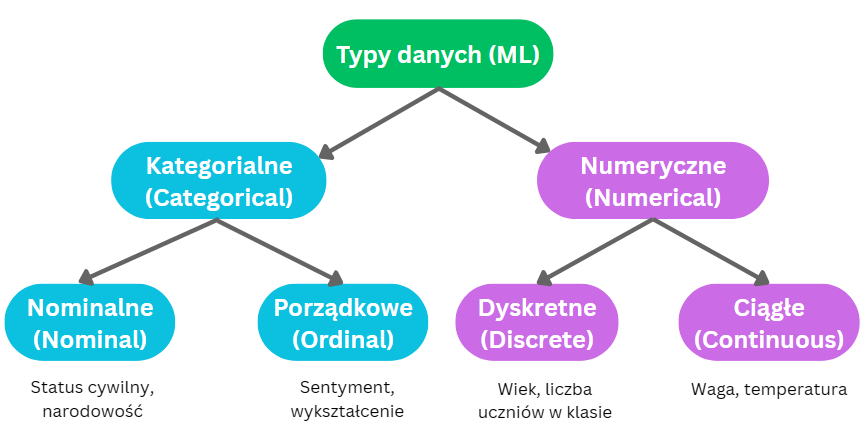

A co powinieneś/powinnaś z tego zapamiętać? Na pewno to, że mamy dane numeryczne (które zwykle możemy dodawać, sumować, uśredniać) oraz kategorialne, na których nie możemy wykonywać operacji matematycznych, a zwykle interesuje nas częstość występowania i ich uporządkowanie.

Powszechnie wykorzystywaną funkcją jest `describe`, która dostarcza podsumowania dla kolumn w zależności od ich typu.

💡 Możemy też wspomnieć coś o wartości [`NaN`](https://en.wikipedia.org/wiki/NaN), która ... nie jest wartością (*Not A Number*). Wykorzystywana jest do oznaczania braków w danych. Napotkanie jej wiąże się zwykle z kłopotami, ale o tym będzie później.

In [ ]:
medical_insurance_data.describe(include='all')

Warto podkreślić, że dla kategorycznych kolumn (*sex*, *smoker*, *region*) zgodnie z oczekiwaniem nie mamy wartości średniej itd. Sprawdźmy dla drugiego zbioru danych.

In [ ]:
social_media_data.dtypes

Jak możesz dostrzec, kolumna `Timestamp` jest typu `object`, jednak w Pythonie mamy dedykowany na to typ danych. Wykorzystamy tę sytuację do pokazania w jaki sposób można przypisać nową wartość do kolumny.
Jeśli nie jest dla ciebie zrozumiały zapis, to przeanalizuj ten prosty przykład

```
def double(n):
  return 2 * n
a = 5
a = double(a)
```
Funkcja najpierw transformuje wartość podaną na wejściu, a potem jej wynik przypisuje z powrotem do tej samej zmiennej. Dokładnie to samo dzieje się poniżej, ale mamy do czynienia z szeregiem.

In [ ]:
social_media_data['Timestamp'] = pd.to_datetime(social_media_data.Timestamp)

In [ ]:
social_media_data.loc[:1, 'Timestamp']

Jeśli podczas wczytywania danych nie podaliśmy typów, to można to zrobić dedykowaną funkcją lub jak wyżej, samodzielnie.

In [ ]:
medical_insurance_data = medical_insurance_data.convert_dtypes()
medical_insurance_data.dtypes

❓ Czy w dokumentacji funkcji użytej do wczytywania danych [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) odnajdujesz argumenty które mogą posłużyć do przypisania i/lub zamiany typu danych?

### 1.4 Funkcje agregujące

W tej sekcji zapoznamy się z funkcjami *agregującymi*, które podsumowują dane w kolumnach – np. obliczają średnią, sumę czy liczbę wystąpień. Są bardzo przydatne, gdy chcemy szybko zorientować się, co zawierają nasze dane, oraz idealnie komponują się z wizualizacjami, które poznasz w kolejnej części lekcji.


💡 Funkcja `mean` oblicza średnią wartość sekwencji i można ją bezpośrednio wywołać na szeregu lub ramce.

In [ ]:
np.round(medical_insurance_data['bmi'].mean(), decimals=2)

In [ ]:
medical_insurance_data[['bmi', 'children', 'charges']].mean()

In [ ]:
medical_insurance_data[['bmi', 'children', 'charges']].mean(axis=1)

❓ Co zrobiła powyższa operacja? Czy ma to sens?

Dostępne są jeszcze funkcje jak `min`, `max` itd. - zachęcamy do zapoznania się z nimi samodzielnie. (Możesz zerknąć [tutaj](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats), ale nie ucz się na pamięć)

Przy cechach kategorialnych interesuje nas liczba kategorii oraz częstość ich występowania. Jest to też okazja do odnalezienia niespójności w wartościach takie jak ich braki czy różny format.

In [ ]:
medical_insurance_data['region'].unique()

❓ Czy w wyniku powyżej odnajdujesz nieścisłości?

Funkcja `value_counts` jest używana do określenia ile razy wystąpiła dana wartość.

In [ ]:
sentiment_counts = social_media_data['Sentiment'].value_counts()
sentiment_counts

Możemy też obliczyć ile razy łącznie wystąpiły wartości - tj. dla indeksu ('southeast', 'male') wartość 394 oznacza, że w tylu wierszach kolumna `region` była równa *southeast* i kolumna `sex` była równa *male*.

In [ ]:
region_sex_counts = medical_insurance_data[['region', 'sex']].value_counts()
region_sex_counts

In [ ]:
region_sex_counts.loc[[('southeast', 'female'), ('northeast', 'male')]] # same as above but uses multiindex selection

#### Grupowanie
Jeśli interesuje nas agregacja (podsumowanie) kolumny dla grupy, to odpowiednia jest do tego metoda `groupby`. (Jej działanie jest takie samo jak wyrażenie `GROUP BY` z języka **sql**). Poniżej przedstawimy to w formie pytań i odpowiadających wywołań funkcji.

🤔 Jaka jest średnia liczba lajków (`Likes`) na każdej platformie?

In [ ]:
social_media_data.Platform = social_media_data.Platform.str.strip() # ignore for now

In [ ]:
social_media_data.groupby('Platform')[['Likes']].mean()

🤔 Jaka jest maksymalna liczba lajków i udostępnień w każdym roku?

In [ ]:
social_media_data.groupby('Year')[['Likes', 'Retweets']].max()

🤔 Jaka jest popularność portali społecznościowych wg każdej płci?

In [ ]:
social_media_data.groupby(['Gender', 'Platform']).size() # .size() computes the number of rows that belong to each group

🤔 Jaka jest długość wypowiedzi (liczba znaków) w zależności od portalu społecznościowego?

💡 zapis `lambda x: <jakaś-operacja-na-x-zwracająca-wartość>` oznacza *funkcję anonimową*, co jest wygodnym zapisem wykorzystywanym, gdy musimy przekazać funkcję jako argument, ale jest ona na tyle krótka (można zapisać jako jedną, nie za długą linijkę), że nie opłaca się jej oddzielnie zapisywać z wykorzystaniem `def <nazwa-funkcji>(): ...`.

In [ ]:
social_media_data.groupby(['Platform'])[['Text']].agg(lambda x: len(x.str.split(" "))) # agg takes in user-defined functions and more

Zdążyłeś/Zdążyłaś już pewnie zauważyć, że do sensownego wywołania funkcji `groupby` potrzebujemy określić kolumny do utworzenia grup, oraz kolumny na których chcemy wykonać metodę agregacji. Grupowanie to temat dosyć obszerny, dlatego tutaj się zatrzymamy, ale do poćwiczenia możesz wykorzystać przykłady niżej.

❓ Jaka jest godzina, w której umieszczanych jest najwięcej postów? A w zależności od platformy?

❓ Jaka jest sumaryczna liczba użytych hashtagów w zależności od płci?



### 1.5 Filtrowanie

Znasz już sposoby na jakie można wybierać konkretne wiersze (`loc`, `iloc`), natomiast nie zawsze z góry wiemy, które indeksy są dla nas interesujące. Z pomocą przychodzi możliwość filtrowania na podstawie wartości kolumn.

Jeśli Python jest dla ciebie w miarę znajomy, to wiesz, że "==" tłumaczymy jako "równa się" (w uproszczeniu). Nowością może być jednak porównywanie sekwencji z wartością - naturalnie dla zwykłej listy pythonowej i wartości tekstowej otrzymalibyśmy `False`.

In [ ]:
['female', 'male', 'female'] == 'male' # test

Następujący kod zwraca *maskę logiczną*, co brzmi może skomplikowanie, ale jest to po prostu szereg wartości `True` lub `False` dla każdego indeksu w zależności od spełnienia warunku. Upraszczając jeszcze bardzej, taką maskę możemy uzyskać jako listę wyników porównań dla kolejnych wierszy. Przewaga tego pierwszego tkwi w prostocie zapisu i szybkości wykonywania się.

In [ ]:
is_female = medical_insurance_data['sex'] == 'female'
is_female

💡`iterrows()` to sposób na iterację po indeksach i wierszach ramki. Staraj się jednak jak najczęściej korzystać z możliwości filtrowania bezpośrednio na ramce, bo zwykle jest to szybszy i przejrzysty sposób.

In [ ]:
mask = []
for index, row in medical_insurance_data.iterrows():
  mask.append(row['sex'] == 'female')
print(mask)

☝ wymiar maski (tj. liczba wierszy) musi być odpowiedni do wymiaru ramki.

💡 Maskę możemy użyć wraz z operatorem `loc` do wybrania tylko tych wierszy, dla których warunek jest spełniony.

In [ ]:
medical_insurance_data.loc[is_female]

💡 Poniżej znajdziesz przykłady filtrowania z użyciem znaków logicznych, które łączą pojedyncze warunki na sposoby:


*   & - oznacza "i", tj. wszystkie pojedyncze warunki muszą być prawdziwe,
*   | - oznacza "lub", tj. co najmniej jeden pojedynczy warunek musi być prawdziwy.




In [ ]:
bmi_in_range = (medical_insurance_data.bmi > 10) & (medical_insurance_data.bmi < 20) # bmi between 10 and 20
medical_insurance_data.loc[bmi_in_range]

💡 `isin([...])` zwraca `True` jeśli wartość występuje w liście i `False` jeśli nie występuje.

In [ ]:
is_in_region = medical_insurance_data['region'].isin(['northwest', 'southwest'])
medical_insurance_data.loc[is_in_region]

💡 "~" oznacza negację, czyli będzie wybierać tylko te wiersze, dla których warunek **nie** jest prawdziwy.

In [ ]:
medical_insurance_data.loc[~is_in_region]

❓ czy liczba wierszy z dwóch ostatnich komórek musi sumować się do całkowitej liczby wierszy?

Poniżej znajdują się dwa przykłady z pojedynczymi warunkami połączonymi "&"(**koniunkcja warunków**), oraz "|" (**alternatywa warunków**).

In [ ]:
is_region_northwest = medical_insurance_data.region == 'northwest'
is_sex_female = medical_insurance_data.sex == 'female'
medical_insurance_data.loc[is_region_northwest | is_sex_female]

In [ ]:
medical_insurance_data.loc[is_region_northwest & is_sex_female]

Możemy też obliczyć dla ilu wierszy spełniony jest warunek (korzystamy tutaj z niejawnej konwersji wartości `True` na `1` oraz `False` na `0`)

In [ ]:
(is_region_northwest & is_sex_female).sum()

### 1.6 Dodawanie nowych kolumn, łączenie ramek danych
W tej sekcji po krótce zapoznamy się możliwościami zmiany struktury ramki, co może ci ułatwić pracę m. in. gdy masz dane z różnych źródeł i musisz je ze sobą połączyć.

Metoda **rename** umożliwia zmianę nazw kolumn lub indeksów, w zależności od parametru *axis*. Jak wspomnieliśmy w sekcji #1.2, parametr określa czy operacja jest wzdłuż wierszy (*axis=0*) czy wzdłuż kolumn (*axis=1*).

☝ Ta operacja zwraca kopię ramki, ze zmianą wprowadzoną przez funkcję, więc przedstawimy dwa sposoby postępowania aby zachować wynik wywołania. Ma to też zastosowanie do innych funkcji z pandas.

In [ ]:
social_media_data.rename({'smoker': 'is_smoker', 'bmi': 'BMI'}, axis=1).head(1)

1. przypisanie zmodyfikowanej kopii ramki do oryginalnej zmiennej

In [ ]:
medical_insurance_data = medical_insurance_data.rename({'smoker': 'is_smoker'}, axis=1) # reassign the variable with a copy of the dataframe
medical_insurance_data.head(n=1)

2. przekazanie wartości `True` do parametru `inplace` - większość metod go posiada, a domyślną wartością jest `False`

In [ ]:
medical_insurance_data.rename({'bmi': 'BMI'}, axis=1, inplace=True) # changes the original dataframe
medical_insurance_data.head(n=1)

#### Łączenie wierszy
Następnie pokażemy jak złączyć dwie ramki wzdłuż wierszy (*axis=0*).

In [ ]:
new_rows_data = {'age': [28.0, 30.0],
                'sex': ['female', 'male'],
                'BMI': [20.4, 25.3],
                'children': [2.0, 1.0],
                'is_smoker': ['yes', 'no'],
                'region': ['southwest', 'southwest'],
                'charges': [1233.12, 1689.9]}
new_rows = pd.DataFrame(new_rows_data)
n = len(medical_insurance_data)
new_rows = new_rows.rename({0: n, 1: n + 1}) # <- comment out this line
new_rows

❓ zobacz czy i jak się połączą ramki, gdy przedostatnia linijka powyżej jest zakomentowana. Czy to dobrze wg ciebie?

💡 `pd.concat` służy do łączenia  ramek wzdłuż wierszy (domyślnie) lub wzdłuż kolumn. Zwraca ona nową ramkę, nie zmieniając żadnej ramki z listy przekazanych jako argument.

In [ ]:
pd.concat([medical_insurance_data, new_rows])

#### Łączenie kolumn
Zobaczmy jak można dodać nową kolumnę. Na potrzeby pokazowe stworzymy sztuczny szereg, ale w ten sam sposób możesz dodać ramkę z danymi uzyskanymi z innego źródła.

In [ ]:
new_column = pd.Series(data=np.random.randint(0, 5, size=n),
                       index=medical_insurance_data.index,
                       name='offer_type')
new_column

Połączenie ramek zachodzi na podstawie równości indeksów.

In [ ]:
pd.concat([medical_insurance_data, new_column], axis=1) # joins along column axis

💡 atrybut `index` zwraca listę indeksów ramki/szeregu.

W poniższym zapisie sztucznie tworzymy indeksy przesunięte o wartość `10` i z powrotem przypisujemy do szeregu.

In [ ]:
new_index = medical_insurance_data.index + 10
new_column.index = new_index
new_column

☝ W poniższym połączeniu wartości `NaN` pojawiły się w kolumnach, które nie występowały jednocześnie w obu tabelach, co wynika z tego, że niektóre indeksy były obecne tylko w jednej ramce.

In [ ]:
pd.concat([medical_insurance_data, new_column], axis=1)

Aby pozbyć się tego problemu, możemy przekazać do parametru `join` wartość `inner`, przez co pozostają tylko indeksy, które występowały w obu ramkach.

In [ ]:
pd.concat([medical_insurance_data, new_column], axis=1, join='inner')

Inną funkcją do łączenia wzdłuż kolumn jest `join` (odpowiada poleceniom `JOIN` z języka **sql**).  

In [ ]:
medical_insurance_data.join(new_column)

❓ Zbadaj, jakie są wyniki, gdy w powyższym wywołaniu podasz wartości parametru `how` jako *left*, a następnie *right*. Za pomoc w zrozumieniu może posłużyć [diagram Venna](https://en.wikipedia.org/wiki/Venn_diagram).

## 2. Przetwarzanie danych przy pomocy **pandas**

### 2.1 Czyszczenie danych
Przejdziemy do bardziej praktycznej części obcowania z danymi, w której dowiesz się,


*   kiedy usuwać, a kiedy uzupełniać brakujące dane,
*   jak transformować wartości tekstowe.



#### Wartości brakujące
Nie zagłębiając się bardzo w [teorię](https://en.wikipedia.org/wiki/Missing_data), wartości może brakować z przyczyn losowych (np. złe formatowanie danych, uszkodzenie pliku), lub w związku z konkretnym zjawiskiem - np. w danych o rankingach kierunków, te uruchomione w aktualnym roku naturalnie nie będą miały ocen dla poprzednich lat.

💡 `isna` zwraca dla każdej komórki `True`, jeśli jest to wartość brakująca i `False` w p. p.

In [ ]:
medical_insurance_data.isna().loc[:1]

In [ ]:
def get_percentage_missing(df, axis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu
  """
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

In [ ]:
missing_cols_mi = get_percentage_missing(medical_insurance_data, axis=0)
missing_cols_mi

☝ Brakujące wartości sprawdzamy zwykle dla kolumn, ale dobrze jest też upewnić się, czy braki są ze sobą zależne, tj. czy mają tendencję występować razem w wierszach.

In [ ]:
missing_rows_mi = get_percentage_missing(medical_insurance_data, axis=1)
missing_rows_mi.unique()

Całkowicie puste wiersze zdarzają się rzadko, ale pokazaliśmy je tutaj w celach dydaktycznych. Chcieliśmy uniknąć sytuacji, w której na podstawie jednego przykładu przyjmiesz, że zawsze należy usuwać dane z dużą liczbą braków. Dlaczego? Bo w zależności od problemu i zbioru danych, nawet 80% braków w kolumnie nie musi oznaczać, że trzeba ją od razu usuwać.

In [ ]:
missing_all_column_values = missing_rows_mi[missing_rows_mi == 100].index
medical_insurance_data.loc[missing_all_column_values]

#### Uzupełnianie/usuwanie brakujących wartości
Kontynuując, możesz znaleźć się w niemalże szekspirowskim dylemacie "usuwać czy nie usuwać?". Pomocne mogą być następujące pytania:

- Czy kolumna jest istotna w kontekście problemu? (Czy imię i nazwisko pacjenta powinno mieć znaczenie w zadaniu klasyfikacji choroby?)

- Czy za większość braków w danych odpowiadają konkretne wiersze (czyli niepełne obserwacje), czy raczej cała kolumna?

- Czy można wykorzystać informacje z innych kolumn do uzupełnienia brakujących wartości?
(np. jeśli brakuje danych w kolumnie `Month`, być może da się je odtworzyć na podstawie kolumny `Timestamp`).

- Czy braki w danych mogą same w sobie stanowić informację?
(np. braki w kolumnie `Gender` — być może osoby o negatywnym nastawieniu wolą nie podawać swojej płci?)

- Czy model, którego chcemy użyć obsługuje domyślnie brakujące dane? (np. *Decision Tree*) Wtedy możemy nie przejmować się brakami, ale warto się nie ograniczać do danego modelu **tylko** tylko z tego powodu.

Warto zawsze rozważyć uzupełnienie brakujących danych, zanim zdecydujesz się na ich odrzucenie. Może się jednak okazać, że konieczne będzie przeprowadzenie eksperymentu — porównanie jakości modelu z daną kolumną i bez niej.

Możesz także wykorzystać regresję logistyczną lub las losowy (czym różnią się te algorytmy — dowiesz się na kolejnej lekcji) do wyboru istotnych atrybutów.

In [ ]:
medical_insurance_data.dropna(how='all', inplace=True) # by default how='any' removes rows with at least one missing value

❓ czy sądzisz, że można po prostu wykorzystać powyższą funkcję (z domyślnym *how='any'*) i nie przejmować się dogłębną analizą brakujących wartości?

#### Strategie uzupełniania brakujących wartości
Uzupełnianie polega na zastąpieniu wartości `NaN` (dokładniej to `np.nan`) inną, która jest odpowiednia do typu danych.
Zbadamy tutaj prostsze sposoby uzupełniania brakujących wartości. We względu na typ danych niektóre mogą być bardziej odpowiednie:

| Typ danych              | Metoda uzupełnienia                         | Opis / Zastosowanie                                                                                               |
| ----------------------- | ------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| Kategorialne            | **Najczęstsza wartość (moda)**              | Dobre rozwiązanie, gdy jedna wartość dominuje                                                                                 |
| Kategorialne            | **„Unknown” / „Other”**                     | Utworzenie nowej, sztucznej kategorii                                                |
| Liczbowe (ciągłe)       | **Średnia (mean)**                          | Gdy dane są normalnie rozłożone (o tym będzie dalej)                                                              |
| Liczbowe (ciągłe)       | **Mediana (median)**                        | Gdy rozkład jest asymetryczny                                                                     |
| Liczbowe / Kategorialne | **Zgodnie z rozkładem istniejących danych** | Losowanie wartości na podstawie rozkładu danych niebrakujących – pozwala zachować naturalne proporcje i wariancję |


In [ ]:
medical_insurance_data.children.isna().sum()

Uzupełnimy kolumnę `children` na podstawie rozkładu jej wartości.

In [ ]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True)

In [ ]:
children_count_prob = get_column_distribution(medical_insurance_data, 'children')
children_count_prob # index - number of children, column - probability of occurrence

Zastosujemy tutaj wiedzę zdobytą na temat filtrowania z sekcji #1.5 oraz funkcję `np.random.choice` która losowo *próbkuje* (losuje) wartości z podanej sekwencji.

In [ ]:
children_values = children_count_prob.index
children_probs = children_count_prob.values

In [ ]:
missing_children_vals = medical_insurance_data.children.isna()
medical_insurance_data.loc[missing_children_vals, 'children'] = np.random.choice(children_values, size=missing_children_vals.sum(), p=children_probs)

In [ ]:
get_column_distribution(medical_insurance_data, 'children')

In [ ]:
medical_insurance_data.children.isna().sum()

Sprawdźmy jeszcze drugi zbiór

In [ ]:
get_percentage_missing(social_media_data, axis=0)

In [ ]:
get_column_distribution(social_media_data, 'Gender')

Jak już było wspomniane wcześniej, brak w tej kolumnie może nieść cenną informację. Zamiast uzupełniać najczęstszą wartością, aby nie zwiększać sztucznie częstości którejś z płci (i tym samym uniknąć stronniczości w danych – data bias), rozsądniej będzie stworzyć nową kategorię `Unknown`.

💡 funkcja [`fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) posłuży nam do uzupełnienia braków konkretną wartością, ale może przyjmować też słownik/szereg/ramkę danych zawierające indeksy wierszy, które powinny być uzupełnione odpowiadającą wartością.

In [ ]:
social_media_data['Gender'] = social_media_data['Gender'].fillna('Unknown')

In [ ]:
get_column_distribution(social_media_data, 'Gender')

#### Ujednolicanie wartości tekstowych
W naszych danych kryje się jeszcze inny błąd, który nie jest widoczny na pierwszy rzut oka.

In [ ]:
social_media_data.Country.unique()

Typ `string` nie jest odporny na obecność dodatkowych pustych spacji, o czym przekonuje porównanie niżej.

In [ ]:
' Canada          ' == ' Canada        ' # test

☝ Dlaczego jest to problematyczne? Otóż w tej sytuacji, dla algorytmu, wartość `'USA'` może być całkowicie niezwiązana z wartością `' USA  '` nawet, jeśli dla nas równość w ich znaczeniu jest oczywista.

Usuńmy więc zbędne spacje. Dla przezorności wybierzemy wszystkie typy kategorialne.

In [ ]:
categorical_columns = social_media_data.select_dtypes(include=['object']).columns
categorical_columns

Funkcja `strip` jest dostępna dla zwykłych stringów, usuwając zbędne spacje na początku i na końcu.

In [ ]:
for col in categorical_columns:
  social_media_data[col] = social_media_data[col].str.strip()

In [ ]:
social_media_data.Country.unique()

Podobnie przeanalizujemy drugi zbiór danych - tutaj mamy problem, który może się pojawić gdy łączysz dane z różnych źródeł, ponieważ nawet same wartości `yes` czy `no` można też *kodować* jako `True` i `False` odpowiednio. Być może już wcześniej zauważyłeś/zauważyłaś problem w kolumnie 'region'.

In [ ]:
for col in medical_insurance_data.select_dtypes(include=['string']).columns:
  print(f"{col}: {medical_insurance_data[col].unique()}")

In [ ]:
medical_insurance_data.loc[medical_insurance_data['region'] == 'north-west', 'region'] = 'northwest'
medical_insurance_data.loc[medical_insurance_data['region'] == 'south east', 'region'] = 'southeast'

In [ ]:
medical_insurance_data['region'].unique()

### 2.2 Modyfikacje i dodawanie kolumn
Nie zawsze musisz się ograniczać do informacji, które dostajesz w zbiorze. *Inżynieria cech* obejmuje też tworzenie nowych kolumn wzbogacających dane. Dla przykładu, posiadając kolumnę oznaczającą miesiące `Month` możemy łatwo stworzyć kolumnę z porami roku `Season`.   

☝ Domyślnie przypisanie ramki do nowej zmiennej nie tworzy kopii, przez co zmiany dokonane poprzez tę nową zmienną są odzwierciedlane w oryginalnej ramce.

In [ ]:
print(f"Przed zmianą: {social_media_data.loc[600, 'User']=}")
social_media_data_2 = social_media_data # assign the same dataframe to a different variable
social_media_data_2.loc[600, 'User'] = 'StudentPwr' # set a new value using the new variable
print(f"Po zmianie: {social_media_data_2.loc[600, 'User']=}")

In [ ]:
print(f"Po zmianie: {social_media_data.loc[600, 'User']=}") # proof that we changed the original dataframe thru the other variable

Kopię ramki można otrzymać przez funkcję `copy`, lub przekazując ramkę do konstruktora `pd.DataFrame(df)`.

💡 Do dodania nowej kolumny (podobnie nowego wiersza) możemy użyć operatorów poznanych w sekcji o indeksowaniu #1.2, poprzez zapis


```
df['newColumnName'] = sequence
```
poniżej wykorzystamy to do stworzenia nowej kolumny z porą roku.

In [ ]:
seasons = np.array(['winter', 'spring', 'summer', 'autumn'])
season_index = ((social_media_data['Month']) % 12 ) // 3
social_media_data['Season'] = seasons[season_index]

💡 funkcja `drop_duplicates` usuwa powtarzające się wiersze. Możesz też jej użyć na całym zbiorze w celu usunięcia duplikatów.

In [ ]:
social_media_data[['Month', 'Season']].drop_duplicates()

❓ Czy odnajdujesz błąd w logice przypisywania pór roku? (Pomyśl o kolumnie `Country`)

In [ ]:
old_comment = social_media_data.Year < 2023
social_media_data['Is old'] = False # this implicitly uses broadcasting so it's the same as assigning a list/Series with only `False` values
social_media_data.loc[old_comment, 'Is old'] = True # DYI: could we directly assign `old_comment` as a column?
social_media_data.loc[[100, 200], 'Is old']

💡 Funkcja `apply` służy do wykonywania operacji na wierszach bądź kolumnach.

In [ ]:
total_activity_fun = lambda x: x['Retweets'] + x['Likes']
social_media_data['Total activity'] = social_media_data.apply(total_activity_fun, axis=1)

❓ Czy można po prostu przypisać `x['Retweets'] + x['Likes']`?

### 2.3 Kodowanie kolumn

Algorytmy uczenia maszynowego nie są w stanie przetrawić wartości tekstowych w ich prawdziwej formie. Wymagają one od nas wcześniejszego zakodowania do postaci liczbowej na możliwe poniższe sposoby:


*   One-hot (gorące/rzadkie kodowanie) – tworzy osobną kolumnę dla każdej unikalnej wartości i zaznacza ją jako `1` (jeśli występuje) lub `0` (jeśli nie). Dobre dla danych bez naturalnego porządku,
*   Ordinal (kodowanie porządkowe) – przypisuje liczby kolejnym wartościom, gdy występuje między nimi porządek (np. `rano = 1`, `popołudnie = 2`, `wieczór = 3`),
*   Binary (kodowanie binarne) – stosowane, gdy mamy tylko dwie możliwe kategorie, np. `tak` / `nie` lub `prawda` / `fałsz`. Kodujemy je jako `0` i `1`,
*   Label (kodowanie etykiet) – przypisuje liczby do każdej kategorii (np. `neutralny = 0`, `pozytywny = 1`, `negatywny = 2`). Używane m.in. do oznaczenia klasy, którą chcemy przewidzieć (np. w klasyfikacji),
* Frequency (kodowanie częstości) - każdej kategorii przypisuje częstość/prawdopodobieństwo wystąpienia. Zmniejsza wymiarowość w porównaniu do *one-hot*, ale może prowadzić do utraty informacji, jeśli kategorie mają te same częstości.

W następnej lekcji zapoznasz się z biblioteką **scikit-learn**, która posiada wygodne narzędzia z gotowymi implementacjami tych kodowań. Tutaj skupimy się na ich zrozumieniu.

#### One-hot encoding

Załóżmy, że chcemy zostawić tylko **n** najczęstszych wartości w danej kolumnie, a resztę zastąpić wartością *other*. Dlaczego chcielibyśmy tak zrobić? W przypadku *kodowania rzadkiego* każda nowa kategoria to dodatkowa kolumna w danych, która będzie mieć praktycznie same zera dla nieczęstych kategorii, co niepotrzebnie zwiększa *wymiarowość* danych.

💡 W dalszej przygodzie z uczeniem maszynowym możesz napotkać się na termin **klątwa wymiarowości**, które w skrócie oznacza, że im więcej cech posiadamy, tym algorytm będzie potrzebował wykładniczo więcej przykładów, aby poprawnie nauczyć się rozróżniać je w wielowymiarowej przestrzeni.

In [ ]:
countries_count = social_media_data.Country.value_counts()

💡 `nlargest` wybiera `n` wierszy z największymi wartościami. Dostępna jest też bliźniacza funkcja `nsmallest`.

In [ ]:
top_10_countries = countries_count.nlargest(n=10)

In [ ]:
top_10_countries

Funkcja `where` przyjmuje warunek oraz wartość, którą zastępowane są komórki, dla których warunek **nie** jest spełniony. (Może ona też przyjąć szereg albo funkcję - odsyłamy do dokumentacji).

In [ ]:
is_in_top_10_countries = social_media_data.Country.isin(top_10_countries.index)  # you can pass in list-like variables to .isin()
social_media_data.loc[:, 'Country'] = social_media_data.Country.where(cond=is_in_top_10_countries, other='Other')

❓ Jak byś zapisał(a) przypisanie powyżej, wykorzystując tylko selektor `loc[]`?

In [ ]:
social_media_data.Country.value_counts()

Liczba kolumn zmieniła się z 17 na 27 po zakodowaniu.

In [ ]:
one_hot_encoded_countries = pd.get_dummies(data=social_media_data, prefix='Country', columns=['Country'], dtype=np.int32) # pass in dataframe and columns to one-hot code
one_hot_encoded_countries.head(n=1)

#### Ordinal encoding
Możemy oczywiście kodować wszystkie wartości zero-jedynkowo (one-hot), jednak nie wykorzystujemy wtedy w pełni potencjału danych, jeśli znamy ich uporządkowanie. Możemy więc przypisać wartościom liczby zgodnie z ich kolejnością występowania.

☝Pamiętaj jednak, że takich zakodowanych wartości nie traktujemy jak liczb, nie ma więc sensu ich dodawanie czy obliczanie średniej.

Funkcja `map` przyjmuje słownik lub funkcję i domyślnie wykonuje przypisanie/wywołanie funkcji na każdym elemencie.

In [ ]:
mapping = {
    'winter': 0,
    'spring': 1,
    'summer': 2,
    'autumn': 3
}

social_media_data['Season'] = social_media_data['Season'].map(mapping)
social_media_data.Season.value_counts()

#### Binary encoding
Jest to przypadek kodowania **one-hot**, gdy mamy tylko dwie kategorie - wtedy jedną z nich oznaczamy jako `1`, a drugą jako `0`. Zwykle takie kodowanie jest też używane do zakodowania *klas* w zadaniu *klasyfikacji binarnej*, gdzie algorytm ma za zadanie na podstawie *cech* nauczyć się, czy do wiersza danych pasuje klasa `0` czy `1`.

In [ ]:
medical_insurance_data.is_smoker.unique()

In [ ]:
medical_insurance_data['is_smoker'] = medical_insurance_data.is_smoker.map({
    'yes': 1, 'no': 0
})
medical_insurance_data['is_smoker'].value_counts()

#### Label encoding

We wspomnianym problemie *klasyfikacji* wyróżniamy jedną kolumnę, której wartości algorytm ma za zadanie przewidzieć.

☝ Nie traktujemy jej wtedy jako cechy, która wpada na wejściu do modelu, ponieważ prowadziłoby to do *przecieku danych* - jest to sytuacja, w której niewłaściwie postąpiliśmy przy przygotowywaniu danych i zawierają one informacje, których model nie powinien widzieć podczas trenowania.



In [ ]:
labels = social_media_data.Sentiment.unique()

💡 `enumerate` jest wbudowaną domyślnie funkcją, która pozwala iterować po krotkach (indeks w liście, wartość).

In [ ]:
labels_mapping = {
    k: i for i, k in enumerate(labels.tolist())
}

In [ ]:
social_media_data['label'] = social_media_data.Sentiment.apply(lambda x: labels_mapping[x])
social_media_data['label']

❓ Czy sądzisz, że przewidywanie klas jest tak samo trudne, gdy jest ich dużo (np. 190, jak tutaj) i gdy jest ich mało (np. 10)?

#### Frequency encoding

Kodowanie częstości polega na przypisaniu wystąpień do każdej kategorii. Możemy też znormalizować te wartości, wtedy będą wyrażać one prawdopodobieństwo wystąpienia.

In [ ]:
country_frequency = np.round(social_media_data['Country'].value_counts(normalize=True), 3)
country_frequency

In [ ]:
country_frequency.to_dict()

In [ ]:
social_media_data['Country_frequency'] = social_media_data['Country'].map(country_frequency.to_dict())

In [ ]:
social_media_data['Country_frequency']

### 2.4 Zmiana zakresu wartości

Niektóre algorytmy uczenia maszynowego (takie jak *KNN*, czy *sieci neuronowe*) nie są odporne na różne skale kolumn numerycznych. Chodzi o to, że jeśli wartości w kolumnie *children* mogą być (zdroworozsądkowo) w zakresie $[0, 15]$, a w kolumnie *charges* w zakresie $[0, 100 000]$, to ta druga kolumna może mieć większy wpływ na proces uczenia się algorytmu tylko ze względu na przyjmowanie dużych wartości.

W swoim zadaniu domowym raczej nie będziesz potrzebował(a) dokonywać zmiany zakresu, ale warto już się z tym zapoznać na potrzeby dalszych lekcji.

#### Standaryzacja

Jest odpowiednia, gdy zakładamy rozkład normalny (jaki to rozkład? Dowiesz się niżej, lub już wiesz z wykładu). Może być jednak wrażliwe, gdy z jakiegoś powodu *odchylenie standardowe* $\sigma$ jest większe za sprawą wartości odstających.

$$ \mu = \frac{\sum_{i=0}^N x_i}{N} $$
$$ \sigma^2 = \frac{\sum_{i=0}^N (x_i - \mu)^2}{N} $$
$$ z = \frac{x - \mu}{\sigma} $$

In [ ]:
medical_insurance_data['charges_standardized'] = (medical_insurance_data['charges'] - medical_insurance_data['charges'].mean()) / medical_insurance_data['charges'].std()
medical_insurance_data['charges_standardized']

#### Normalizacja min-max

Innym sposobem jest obcięcie do przedziału wyznaczonego przez maksymalne i minimalne wartości. Wynikowo zwykle jest to $[0, 1]$, ale zawsze możesz dostosować matematycznie wzór do swoich potrzeb.

$$ v = \frac{x - min(x)}{max(x) - min(x)}$$

☝ Jeżeli nie możesz założyć, że wartości zawsze będą w zakresie od $[min(x), max(x)]$, to kodowanie może nie być odpowiednie. W praktyce często się je stosuje do wartości pikseli, ponieważ ich zakresem jest $[0, 255]$.

❓ Co należy zmienić, by nowym zakresemy było $[-1, 1]$?

In [ ]:
medical_insurance_data['children_normalized'] = (medical_insurance_data['children'] - medical_insurance_data['children'].min()) / (medical_insurance_data['children'].max() - medical_insurance_data['children'].min())
medical_insurance_data['children_normalized']

#### Logarytmowanie

Inną, często stosowaną transformacją jest nałożenie logarytmu na każdą wartość. Jest to odpowiednie, gdy wartości są w zakresie $(0, \infty]$, oraz występuje z lewej/prawej strony rozkładu ogon. W ten sposób zmniejszamy wpływ wartości odstających w przypadku, gdy nie możemy ich usunąć (więcej o rozkładach/outlierach znajdziesz w następnej sekcji).

❓ Dlaczego nie możemy logarytmować wartości ujemnych?

In [ ]:
medical_insurance_data['charges_log'] = np.log1p(medical_insurance_data['charges']) # applies log(1 + x) -> DYI: do you know why we would add 1 to each value?
medical_insurance_data['charges_log']

## Podsumowanie

Na tym zakończymy część poświęconą pracy z biblioteką **pandas**. Nie wyczerpało to oczywiście wszystkiego, co ma ona do zaoferowania, ale zachęcamy do jej eksploracji np. w ramach zadania domowego.

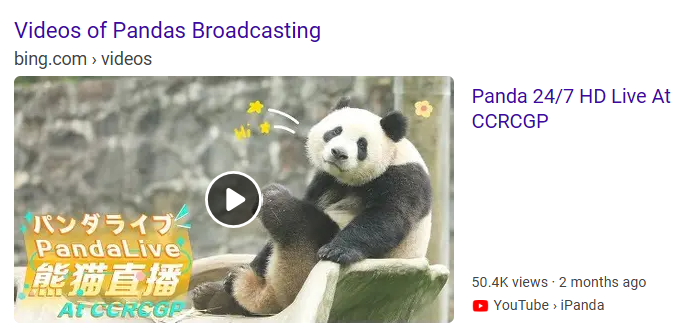

## 3. Wprowadzenie do bibliotek **matplotlib** i **seaborn**

Komputer świetnie radzi sobie z liczbami, ale dla ludzi bywają one trudne do zinterpretowania bez kontekstu. Dlatego wizualizacja danych jest tak istota, bowiem przekształca surowe liczby w obrazy, które łatwo zrozumieć intuicyjnie. Zamiast analizować tysiące wartości w tabeli, jednym rzutem oka możemy dostrzec zależności, anomalie czy błędy.

**Matplotlib** do potężne narzędzie do tworzenia podstawowych wykresów — liniowych, słupkowych, punktowych... i można by jeszcze tak długo wymieniać. Każdy z nich możecie swobodnie edytować, dopasowując wykresy do narzuconych wymogów.

Jeżeli ta lekcja to dla was za mało i jesteście głodni wiedzy, te cheatsheety mogą was zainteresować -> https://matplotlib.org/cheatsheets/
(Uwaga! Niektóre formuły podane w tych plikach nie są już aktualne)

Jeżeli matplotlib nie zaspokoił waszego artystycznego ducha, a w kodzie cenicie sobie niewielką ilość kodu przy maksimum efektu - **seaborn** będzie waszym przyjacielem.

Razem, obie te biblioteki potrafią tworzyć niezwykłe wizualizacje.

In [ ]:
medical_insurance_data = pd.read_csv(base_path / 'Medical_insurance.csv')
medical_insurance_data_corrupted = pd.read_csv(base_path / 'Medical_insurance_corrputed.csv')
social_media_data = pd.read_csv(base_path / 'sentimentdataset_corrputed_2.csv', index_col=0)

### 3.0 Import bibliotek

Każdą bibliotekę w pythonie przed użyciem należy zaimportować. Matplotlib i seaborn nie są tutaj wyjątkiem.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1 Szybka ściąga

| **Wykres**      | **Zastosowanie**                             | **Potrzebne dane**                  | **Kod (skrótowy)**                                                                          |
| --------------- | -------------------------------------------- | ----------------------------------- | ------------------------------------------------------------------------------------------- |
| **Histogram**   | Rozkład jednej zmiennej liczbowej            | 1 kolumna liczbowa (`int`, `float`) | `plt.hist(df['age'])`<br>`sns.histplot(data=df, x='age')`                                   |
| **Boxplot**     | Rozkład + wartości odstające                 | 1 kolumna liczbowa lub grupy        | `plt.boxplot(df['age'])`<br>`sns.boxplot(data=df, y='age')`                                 |
| **Barplot**     | Porównanie średnich / sum / liczebności grup | 1 kategoria + 1 liczba (agregacja)  | `plt.bar(categories, values)`<br>`sns.barplot(x='sex', y='charges', data=df)`               |
| **Scatterplot** | Związek między 2 zmiennymi liczbowymi        | 2 kolumny liczbowe                  | `plt.scatter(df['age'], df['charges'])`<br>`sns.scatterplot(x='age', y='charges', data=df)` |
| **Lineplot**    | Trendy, zmienne w czasie                     | 1 kolumna x (ciągła) + 1 y (liczby) | `plt.plot(x, y)`<br>`sns.lineplot(x=x, y=y)`                                                |
| **Heatmap**     | Korelacje lub wartości w macierzy            | Macierz (np. `df.corr()`)           | `plt.imshow(df.corr())` + `plt.colorbar()`<br>`sns.heatmap(df.corr(), annot=True)`          |



### 3.2 Wykres liniowy

Aby wizualizować dane, najpierw musimy je mieć :)

Do stworzenia wykresu liniowego potrzebujemy kilku punktów o wiadomych współrzędnych x i y.

In [ ]:
x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

Jeżeli nie chcecie aby na waszym wykresie znajdował się tytuł, siatka czy podpisy pod osiami - usuńcie z kodu linie, która za to odpowiadają.

In [ ]:
plt.plot(x, y) # enter the x and y coordinates
plt.title("Simple Line Plot") # title of the plot
plt.xlabel("X Axis") # x axis label
plt.ylabel("Y Axis") # y axis label
plt.grid() # add grid in the background
plt.show() # makes the plot appear

### 3.3 Wykres słupkowy

In [ ]:
categories = ['Apples', 'Bananas', 'Cherries'] # on the x axis we will have categories
values = [5, 7, 3] # and their count

Jak widać poniżej, wygląd wykresu można w latwy sposób zmieniać.
*   **color** - oznacza kolor wypełnienia wykresu
*   **edgecolor** - jaki kolor obramówki powinny mieć słupki

In [ ]:
plt.bar(categories, values, color='orange', edgecolor='black')
plt.title("Fruit Count")
plt.xlabel("Fruit")
plt.ylabel("Quantity")
plt.show()

Teraz możemy zrobić z tego wersję pro. Jeśli w zestawie danych znajduje się kolumna zawierająca kategorie (np. „palacz” z wartościami „tak” lub „nie”), wykres słupkowy to jeden z najlepszych sposobów wizualizacji częstotliwości występowania każdej kategorii.

Poniżej krótkie wyjaśnienie nowych komend.

| Step                            | What it Does                                               |
| ------------------------------- | ---------------------------------------------------------- |
| `counts.plot(kind='bar')`       | Creates a **bar chart** using `matplotlib`.       |
| `plt.title()`, `xlabel()`, etc. | Add labels and formatting to make the chart readable.      |


In [ ]:
counts = medical_insurance_data['smoker'].value_counts()

plt.figure(figsize=(6, 4)) # set the size of chart
counts.plot(kind='bar', color='steelblue', edgecolor='black') # ❓ DYI: can you change the kind of the plot? what happens if you choose eg scatter
plt.title('Distribution of smoker')
plt.xlabel('smoker')
plt.ylabel('Count')
plt.xticks(rotation=0) # it rotates the column names
plt.tight_layout() # adjust the padding between and around subplot, plots look nicer
plt.show()


### 3.4 Histogram

Zwróć uwagę na to, że w przypadku histogramu siatka ustawiła się automatycznie. Aby ją wyłączyć wystarczy użyć: **plt.grid(False)**

In [ ]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 5] # the input data is just single array

plt.hist(data, bins=5, color='skyblue', edgecolor='black') # you can choose the number of bins
plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### 3.5 Wykres pudełkowy

💡Zamiast wpisywać tytuł na sztywno, możesz wstawić zmienną (np. column_name) do tekstu. Python automatycznie podstawi jej wartość.

In [ ]:
# we need to create a dataframe
df = pd.DataFrame({'Value': [23, 25, 22, 29, 24, 27, 30, 31, 24, 26, 28, 30, 22]})

column_name = 'Value'

plt.figure(figsize=(5, 4))
sns.boxplot(data=df, color='skyblue')
plt.title(f"Distribution of {column_name} (boxplot)")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

### 3.6 Wykres punktowy

In [ ]:
df = pd.DataFrame({
    'age': [23, 25, 31, 40, 50, 60, 35, 45, 55, 30],
    'charges': [3000, 3200, 4000, 5500, 8000, 13000, 4200, 7000, 11000, 3900]
})

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='age', y='charges', color='steelblue')
plt.title("Relationship Between Age and Charges")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.tight_layout()
plt.show()

### 3.7 Heatmapa


In [ ]:
df = pd.DataFrame({
    'age': [23, 25, 31, 40, 50, 60, 35, 45, 55, 30],
    'bmi': [22.1, 24.3, 27.5, 29.0, 28.5, 31.2, 25.6, 26.4, 30.1, 23.7],
    'charges': [3000, 3200, 4000, 5500, 8000, 13000, 4200, 7000, 11000, 3900]
})

# calculate correlation matrix
corr_matrix = df.corr(numeric_only=True) # numeric only, non numeric data is ignored

# annot=True let us see the numbers on the plot
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### 3.8 Mnogie wykresy

Biblioteka matplotlib daje nam możliwość przedstawienia kilku wykresów na jednym obrazie. Oznacza to, że nie musimy wywoływać ich jeden po drugim.

In [ ]:
df = pd.DataFrame({
    'bmi': [22.1, 25.3, 26.5, 27.8, 28.5, 31.0, 29.2, 30.5],
    'charges': [3200, 4000, 5000, 6000, 9000, 13000, 8500, 12000]
})

# create a figure with two subplots next to each other
plt.figure(figsize=(12, 5))

# 1st plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is plot 1
sns.boxplot(x=df['bmi'], color='lightgreen')
plt.title('BMI Distribution (Boxplot)')
plt.xlabel('BMI')

# 2nd plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is plot 2
sns.scatterplot(x='bmi', y='charges', data=df, color='darkorange', alpha=0.6)
plt.title('BMI vs Charges (Scatterplot)')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

## 4. Wizualizacja danych przy pomocy **matplotlib** i **seaborn**

### 4.1 Rozkłady danych

💡Rozkład danych w uczeniu maszynowym to sposób przedstawienia, jak często występują różne wartości w zbiorze danych. Pozwala zrozumieć, jakie są cechy danych, np. czy wartości są rozłożone równomiernie lub czy skupiają się wokół pewnych liczb.

Warto analizować zarówno dane **numeryczne** (liczbowe), które mogą mieć różne rozkłady i zakresy, jak i dane **kategoryczne** (np. płeć, kolor), gdzie rozkład pokazuje, jak często pojawiają się poszczególne kategorie. Taka analiza pomaga wybrać odpowiednie metody przetwarzania danych i modele, dzięki czemu uczenie maszynowe działa skuteczniej i daje lepsze wyniki.

**Dane numeryczne**

In [ ]:
def plot_numeric_histogram(df, column_name):
    """
    Plots a histogram for the specified column in the DataFrame,
    and adds vertical lines for the mean and median.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    Returns:
        None. Displays the histogram.
    """

    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
plot_numeric_histogram(medical_insurance_data, 'bmi')

💡 Rozkład **normalny**, nazywany też rozkładem Gaussa, to jeden z najważniejszych rozkładów w statystyce i uczeniu maszynowym, ma on charakterystyczny kształt dzwonu. Wartości skupiają się wokół średniej, a im dalej od niej, tym rzadziej występują. Wartości rozkładu normalnego są symetrycznie rozłożone względem średniej.

Na powyższym wykresie widać histogram rozkładu zmiennej bmi. Można zauważyć, że rozkład jest zbliżony do normalnego, ponieważ:

* Większość wartości skupia się w okolicach 27-35
* Wykres ma kształt przypominający dzwon, z wyraźnym szczytem w środku
* Rozkład jest mniej więcej symetryczny, choć lekko przesunięty

Z takiego wykresu możemy odczytać, że większość badanych osób ma BMI w określonym przedziale, a wartości bardzo niskie lub bardzo wysokie są rzadkie.

In [ ]:
plot_numeric_histogram(medical_insurance_data, 'charges')

Na powyższym wykresie widzimy histogram zmiennej charges, który nie ma kształtu rozkładu normalnego, a rozkład skośny (konkretniej skośnośny prawostronnie). Większość wartości skupia się po lewej stronie (niższe wartości), a nieliczne, znacznie większe wartości tworzą długi „ogon” po prawej.

Z wykresu można odczytać, że:

* Większość osób ma stosunkowo niskie opłaty medyczne (np. < 15 000)
* Istnieje niewielka grupa osób z bardzo wysokimi kosztami (nawet powyżej 60 000) — są to wartości odstające
* Rozkład jest asymetryczny, a średnia jest wyższa niż mediana, co jest typowe dla rozkładów prawoskośnych


**Dane kategoryczne**

In [ ]:
def plot_categorical_column(df, column_name):
    """
    Plots a bar chart for the specified categorical column.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """

    # count occurrences of each category
    counts = df[column_name].value_counts()

    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
plot_categorical_column(medical_insurance_data, 'smoker')

### 4.2 Wykres pudełkowy

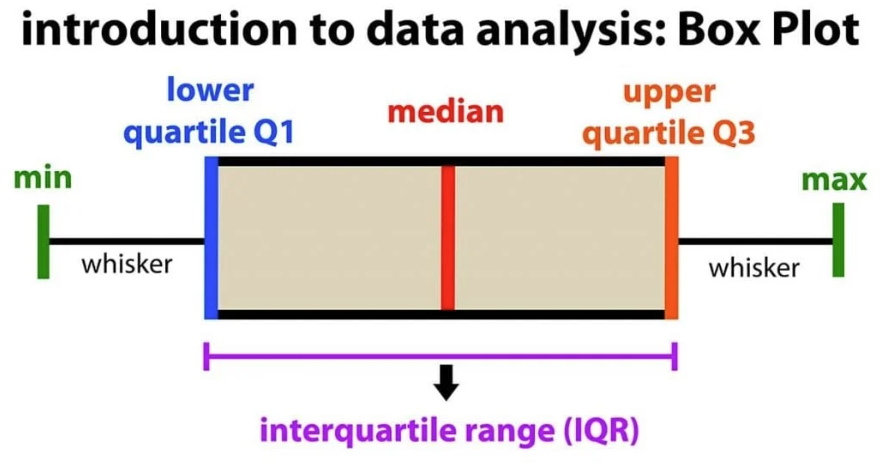

Wykres pudełkowy (boxplot) to popularna technika wizualizacji rozkładu danych liczbowych. Do lepszego wytłumaczenia, co oznaczają poszczególne fragmenty posłużę się obrazem pochodzącym ze strony: https://www.simplypsychology.org/boxplots.html

💡 Elementy wykresu pudełkowego:

* **Mediana (Q2)**: to środkowa wartość, która dzieli dane na połowę.
Jeśli liczba jest nieparzysta to jest ona środkową wartością, a jeśli parzysta to jest to średnia z dwóch środkowych
* **1. kwartyl (Q1)**: wartość poniżej której leży 25% danych
* **3. kwartyl (Q3)**: wartość poniżej której leży 75% danych
* **Rozstęp międzykwartylowy (IQR)**: To różnica między Q3 a Q1. Pokazuje, jak rozciągnięte jest środkowe 50% danych
* **Wąsy**: górne i dolne wąsy reprezentują wyniki poza środkowym 50%. Wszystkie wartości poza tym zakresem są uznawane za odstające (outliers) i pokazywane jako kropki
* **Minimum**: najmniejsza wartość w zbiorze danych (pomijając wartości odstające)
* **Maksimum**: największa wartość w zbiorze danych (również bez outlierów)
* **Wartości odstające**: to obserwacja liczbowo odległa od pozostałych danych, na wykresie przedstawiana w postaci kropek. Matematycznie można je wyznaczyć za pomocą wzoru: **Q1 – 1,5 * IQR** (poniżej minimum) lub  **Q3 + 1,5 * IQR** (powyżej maksimum)

❓ Jak będzie wyglądał boxplot rozkładu skośnego lewo- i prawostronnie?

In [ ]:
def boxplot(df, column_name):
    """
    Displays a boxplot of the choosen column to show its distribution.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen') # as you can see, you can use sns and plt at the same time
    plt.title(f'Distribution of {column_name} (boxplot)')
    plt.xlabel(column_name)

    plt.show()

In [ ]:
boxplot(medical_insurance_data, 'bmi')

Powyższy boxplot BMI pokazuje, że większość danych mieści się w typowym przedziale wartości, ale występują wyraźne obserwacje odstające. Osoby z bardzo wysokim BMI, znacznie przekraczającym górną granicę wąsów. Mediana znajduje
się w mniej więcej równej odległości od pierwszego i trzeciego kwartylu co oznacza, że mamy do czynienia z rozkładem normalnym. Obecność outlierów może wskazywać na błędy pomiarowe, nietypowe przypadki kliniczne lub specyficzną grupę respondentów.

💡 Istnieją 2 główne przeliczniki do usuwania wartości odstających - 1.5 oraz 3.0, które mnożymy przez IQR (wzór poniżej).

**1.5 * IQR** – to standardowy próg. Wartości mniejsze niż Q1 – 1.5 * IQR lub większe niż Q3 + 1.5 * IQR uznaje się za typowe outliery. Ten próg jest najczęściej używany

**3.0 * IQR** - to próg używany do wykrywania ekstremalnych outlierów, czyli bardzo nietypowych i skrajnych wartości (znajdujących się dalej od końców wąsa)

In [ ]:
Q1 = medical_insurance_data['bmi'].quantile(0.25) # lower quantile
Q3 = medical_insurance_data['bmi'].quantile(0.75) # upper quantile
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

In [ ]:
boxplot(medical_insurance_data, 'age')

Wykres pudełkowy przedstawia rozkład wieku respondentów w badanej próbce. Większość wartości mieści się w przedziale od około 30 do 50 lat — to zakres między pierwszym (Q1) a trzecim kwartylem (Q3), a mediana (środkowa wartość) znajduje się blisko 40 roku życia. Wąsy rozszerzają ten zakres od ok. 20 do ok. 60 lat, pokazując obserwacje, które nie są odstające. Brak punktów poza wąsami sugeruje, że w danych nie występują istotne outliery.

### 4.3 Scatterplot

💡 Scatterplot (czyli wykres punktowy) to wykres, który pokazuje związek między dwiema zmiennymi liczbowymi. Każdy punkt na wykresie reprezentuje jedną obserwację w danych. Używa się go się go do sprawdzania zależności (czy większy wiek wiąże się z wyższymi kosztami leczenia?), stopnia korelacji (czy dwa parametry mają jakiś związek ze sobą) czy też identyfikacji outlierów (punkty oddalone od reszty)

In [ ]:
def scatterplot(df, column_name, y):
    """
    Plots a scatterplot between the chosen column and 'charges'.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot against 'charges'.
    Returns:
        None. Displays the scatterplot.
    """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=column_name, y=y, color='darkorange', alpha=0.6)
    plt.title(f'{column_name} vs {y}')
    plt.xlabel(column_name)
    plt.ylabel('Charges')
    plt.tight_layout()
    plt.show()

In [ ]:
scatterplot(medical_insurance_data_corrupted, 'bmi', 'age')

Na przedstawionym wykresie punktowym obserwujemy zależność między wartościami BMI a wysokością opłat medycznych. Widać na nim, że wartości BMI skupiają się w bardzo wąskim zakresie z kilkoma outlierami. Oznacza to, że dane pochodzą od bardzo specyficznej grupy osób lub sposób ich zapisu jest w pewien sposób nieprawidłowy (w tym przypadku wynika z pustych miejsc w tabeli).

In [ ]:
scatterplot(medical_insurance_data, 'age', 'charges')

Wykres punktowy przedstawia zależność między wiekiem a wysokością opłat, jakie ponoszą poszczególne osoby. Na podstawie rozmieszczenia punktów można zauważyć **dodatnią korelację**: im wyższy wiek, tym większe opłaty. Szczególnie wyraźne jest to po 40. roku życia, gdzie wartości gwałtownie rosną.

☝ Dodatkowo na wykresie można zauważyć wyraźne poziome skupiska punktów, co sugeruje, że inne zmienne kategoryczne (takie jak status palenia lub BMI) współdziałają z wiekiem i wpływają na wysokość kosztów. Taki wzorzec wskazuje, że choć wiek jest silnym predyktorem, interakcje z innymi zmiennymi również odgrywają ważną rolę i powinny być uwzględnione w dalszym modelowaniu.

In [ ]:
def categorical_and_charges(df, categorical_column):
    """
    Plots a boxplot showing the distribution of 'charges' across categories in the given column.
    Parameters:
        df (pandas.DataFrame): The DataFrame with the data.
        categorical_column (str): The name of the categorical column.
    Returns:
        None. Displays the boxplot.
    """

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=categorical_column, y='charges', palette='Set2')
    plt.title(f'Charges by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Charges')
    plt.tight_layout()
    plt.show()

In [ ]:
categorical_and_charges(medical_insurance_data, 'sex')

☝ Dla danych liczbowych, takich jak wiek, dochód czy wydatki, używa się wykresów punktowych, które pozwalają ocenić, czy istnieje zależność pomiędzy dwiema zmiennymi numerycznymi. Gdy chcemy porównać zmienną liczbową względem zmiennej kategorycznej (np. koszty leczenia w różnych grupach płci), stosuje się wykresy pudełkowe (boxploty).

Rozkład opłat dla mężczyzn i kobiet wydaje się dość podobny. Chociaż w obu grupach występuje wiele wartości odstających o wysokich wartościach, mediana opłat jest tylko nieznacznie wyższa u mężczyzn. Posiadają oni jednak o wiele wyższy trzeci kwantyl oraz większą wartość maksimum co sugeruje, że płeć może mieć pewien wpływ na koszt ubezpieczenia.

### 4.4 Heatmap

Aby przedstawić heatmapę dla wszystkich kolumn dostępnych w zestawie danych, należy najpierw zmienić dane z kategorycznych na liczbowe, tak, jak przedstawiono to w sekcji 2.3.

Heatmapa to wykres, który przedstawia dane w formie kolorowej siatki. Im jaśniejszy, ciemniejszy lub intensywniejszy kolor, tym wyższa (lub niższa) wartość w danym miejscu.

Na osi X i Y znajdują się zwykle zmienne (np. kolumny z DataFrame), a kolor pokazuje zależność lub intensywność — np. korelację, częstość występowania, obecność braków itp.

In [ ]:
# label encoding
medical_insurance_data['sex'] = medical_insurance_data['sex'].map({'male': 0, 'female': 1})
medical_insurance_data['smoker'] = medical_insurance_data['smoker'].map({'no': 0, 'yes': 1})

# one hot encoding
medical_insurance_data = pd.get_dummies(medical_insurance_data, columns=['region'], drop_first=False)

In [ ]:
def plot_correlation_matrix(df):
    """
    Plots a heatmap showing the correlation matrix for numeric columns in the DataFrame.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing numeric data.
    Returns:
        None. Displays the correlation heatmap.
    """
    # compute correlation matrix only for numeric columns
    corr = df.corr(numeric_only=True)

    # fmt=".2f" rounds the number to 0.01
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_correlation_matrix(medical_insurance_data)

💡 **Macierz korelacji** pomaga zrozumieć, jak silnie cechy liczbowe są ze sobą powiązane, szczególnie ze zmienną docelową (charges). Wyższa korelacja (bliższa 1 lub -1) wskazuje na silniejszą zależność, co może być bardzo przydatne w przewidywaniu wartości docelowej.

Z macierzy wynika, że opłaty mają najsilniejszą dodatnią korelację ze smoker. Oznacza to, że palenie jest silnie powiązane z wyższymi kosztami opieki medycznej, co jest zgodne z rzeczywistymi oczekiwaniami.

Następnie, istnieje umiarkowana dodatnia korelacja między opłatami a wiekiem, co wskazuje, że osoby starsze mają tendencję do ponoszenia wyższych kosztów opieki medycznej. BMI również wykazuje słabszą, ale zauważalną dodatnią korelację, co sugeruje, że wyższe wartości BMI mogą przyczyniać się do wzrostu kosztów opieki medycznej.

Z drugiej strony, cechy takie jak sex, region_southwest i region_nortwest mają bardzo niską lub bliską zeru korelację z opłatami, co sugeruje, że mogą mieć niewielki wpływ na zmienną docelową. Chociaż nadal mogą wpływać na prognozy w bardziej złożony (nieliniowy) sposób, ich bezpośredni związek z opłatami jest minimalny.

## Podsumowanie

To już wszystko, jeśli chodzi o podstawową eksplorację danych i ich wizualizację. Dzięki prostym wykresom i analizie rozkładów łatwiej dostrzegać ukryte wzorce, zależności czy problemy w danych. W kolejnej lekcji przejdziecie krok dalej — poznacie więcej o uczeniu maszynowym i sprawdzicie, co nasze dane mogą naprawdę przewidzieć.

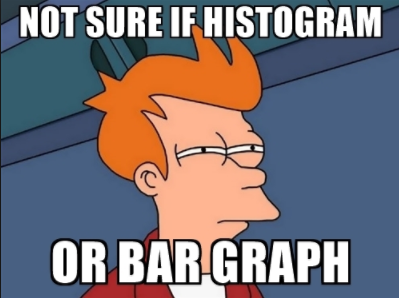